<a href="https://colab.research.google.com/github/ThiharaKumarasinghe/Assignment_2-Computer-Vision-and-Image-Processing/blob/main/Assignment_II_EE7204_3645.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Qeustion 1

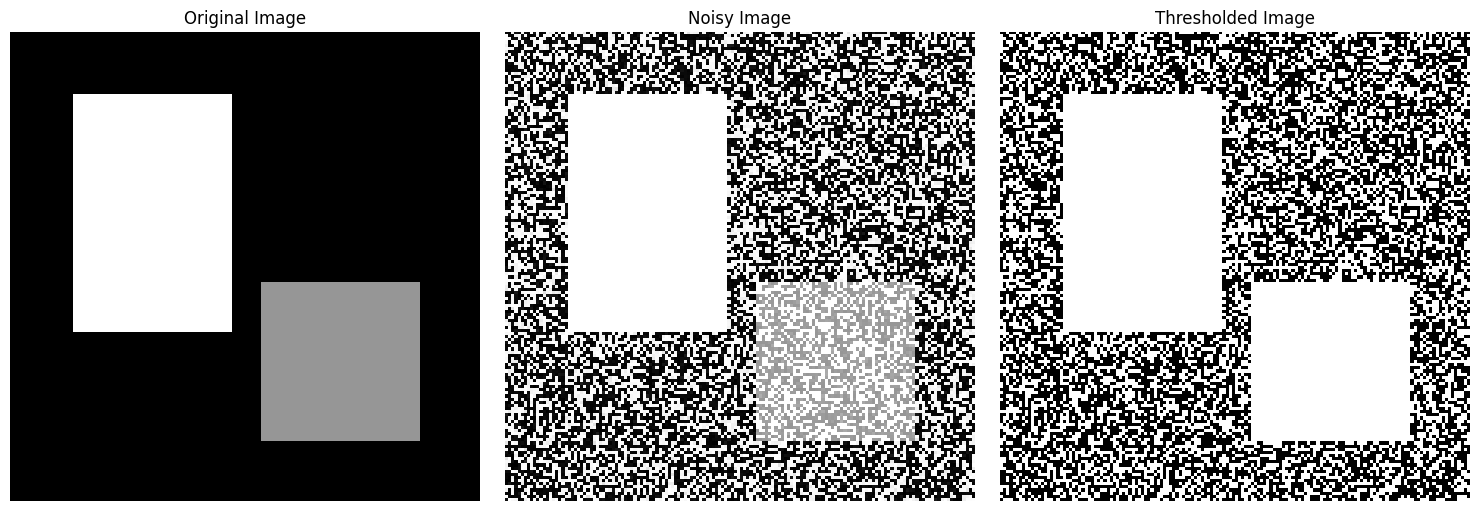

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


# Function for add Gaussian noise
def addGaussinaNoise(image, mean=0, sigma=10):
  # generate a noise
  noise = np.random.normal(mean, sigma, image.shape).astype(np.uint8)
  # add noise image and original image
  noisy_image = cv.add(image, noise)
  return noisy_image

# Function to implement Otsu's algorithm
def otsuThresholding(image):
  _, thresholdedImage = cv.threshold(image, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
  return thresholdedImage



# Create a black background for the image
background = np.zeros((150, 150), dtype=np.uint8)

# Coordinates of the two object --> (x, y, width, height)
object1 = (20, 20, 50, 75)
object2 = (80, 80, 50, 50)

# Draw the objects on the background
cv.rectangle(background, (object1[0], object1[1]), (object1[0] + object1[2], object1[1] + object1[3]), 255, -1)
cv.rectangle(background, (object2[0], object2[1]), (object2[0] + object2[2], object2[1] + object2[3]), 150, -1)

# Define the image
img = background

# Generate noise image with original image dimensions
noisyImage = addGaussinaNoise(img)


# Test Otsu’s algorithm
thresholdedImage = otsuThresholding(noisyImage)

# Create a subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the images
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(noisyImage, cmap='gray')
axes[1].set_title('Noisy Image')
axes[1].axis('off')

axes[2].imshow(thresholdedImage, cmap='gray')
axes[2].set_title('Thresholded Image')
axes[2].axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Question 2

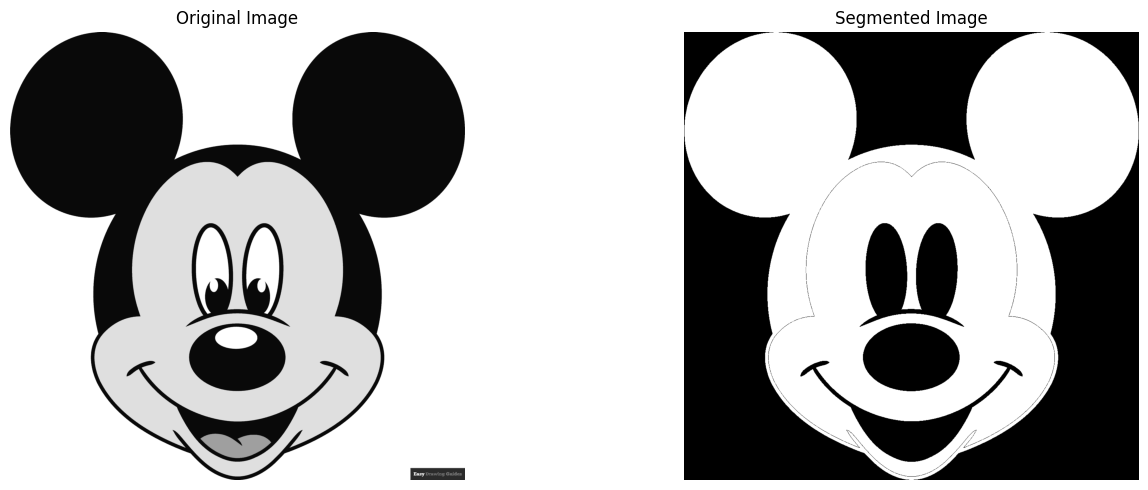

In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Function for implementing a region-growing technique for image segmentation
def regionGrowing(image, seeds, threshold):
    # Create a mask to keep track of segmented pixels
    height, width = image.shape[:2]
    segmented = np.zeros((height, width), dtype=np.uint8)

    # For store the coordinates of pixels in the region
    region_coordinates = []

    # Define 4-neighborhood connectivity
    neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    # Convert seed coordinates to integers
    seeds = [(int(seed[0]), int(seed[1])) for seed in seeds]

    # Add the seeds to the region and mark as visited
    for seed in seeds:
        region_coordinates.append(seed)
        segmented[seed[0], seed[1]] = 1

    # Start region growing
    while len(region_coordinates) > 0:
        # Get the last pixel from the region
        current_pixel = region_coordinates.pop()

        # Check 4-connectivity neighbors
        for dx, dy in neighbors:
            x, y = current_pixel[0] + dx, current_pixel[1] + dy

            # Check if the neighbor is within the image bounds
            if 0 <= x < height and 0 <= y < width:
                # Check if the neighbor is not visited yet
                if segmented[x, y] == 0:
                    # Check if the pixel value is within the threshold
                    if abs(int(image[x, y]) - int(image[current_pixel])) <= threshold:
                        # Add the neighbor to the region and mark as visited
                        region_coordinates.append((x, y))
                        segmented[x, y] = 1

    return segmented

# Load the image and convert to gray image
img = cv.imread('mickeyMouse.webp', cv.IMREAD_GRAYSCALE)

# initialize seed points and threshold
seedPoints = [(300, 300), (500, 500), (700, 750)]  # Example seed points
threshold = 20

# call region growing function
segmentationImage = regionGrowing(img, seedPoints, threshold)


# Create a subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Display the images
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(segmentationImage, cmap='gray')
axes[1].set_title('Segmented Image')
axes[1].axis('off')


# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
